In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df = pd.read_csv('scrap_results/-1408231792.csv')

In [77]:
df_grouped = df.groupby('icao24', group_keys=True).apply(lambda x: x)
df_grouped['updateinterval'] = df_grouped['lastposupdate'].diff()
df = df_grouped.reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)
df = df[(df['updateinterval'] > 0) & (df['updateinterval'] < 10)]
df.dropna(subset=["updateinterval"], inplace=True)
display(df)

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour,item,updateinterval
3,1655980803,0100a7,49.911028,8.791735,231.374013,291.659471,0.00000,MSR5090,False,False,False,1000.0,12192.00,12672.06,1.655981e+09,1.655981e+09,1655978400,-1408231792,3.799
4,1655980804,0100a7,49.911804,8.788701,231.374013,291.659471,0.00000,MSR5090,False,False,False,1000.0,12192.00,12672.06,1.655981e+09,1.655981e+09,1655978400,-1408231792,0.860
5,1655980805,0100a7,49.912471,8.786019,231.374013,291.659471,0.00000,MSR5090,False,False,False,1000.0,12192.00,12672.06,1.655981e+09,1.655981e+09,1655978400,-1408231792,1.013
6,1655980806,0100a7,49.913315,8.782774,231.374013,291.659471,0.00000,MSR5090,False,False,False,1000.0,12192.00,12672.06,1.655981e+09,1.655981e+09,1655978400,-1408231792,1.049
7,1655980807,0100a7,49.914054,8.780080,231.374013,291.659471,0.00000,MSR5090,False,False,False,1000.0,12192.00,12672.06,1.655981e+09,1.655981e+09,1655978400,-1408231792,0.913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256020,1655997056,e4978e,51.418167,2.127116,250.263655,275.780909,14.95552,PSFGT,False,False,False,4420.0,10111.74,10378.44,1.655997e+09,1.655997e+09,1655996400,-1408231792,1.018
2256021,1655997057,e4978e,51.418442,2.122811,250.212362,275.663706,15.28064,PSFGT,False,False,False,4420.0,10126.98,10401.30,1.655997e+09,1.655997e+09,1655996400,-1408231792,1.004
2256022,1655997058,e4978e,51.418669,2.119217,249.700434,275.675356,14.95552,PSFGT,False,False,False,4420.0,10142.22,10416.54,1.655997e+09,1.655997e+09,1655996400,-1408231792,1.060
2256023,1655997059,e4978e,51.418809,2.116394,249.700434,275.675356,14.95552,PSFGT,False,False,False,4420.0,10157.46,10431.78,1.655997e+09,1.655997e+09,1655996400,-1408231792,0.755


## Range

In [78]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat_receiver, lon_receiver):
    R = 6371.0  # radius of the Earth in km

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat_receiver_rad = radians(lat_receiver)
    lon_receiver_rad = radians(lon_receiver)

    dlon = lon_receiver_rad - lon1_rad
    dlat = lat_receiver_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat_receiver_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance  # in km


lat_receiver = 51.989988084475705
lon_receiver = 4.375442420935356

df['range_km'] = df.apply(lambda row: haversine(row['lat'], row['lon'], lat_receiver, lon_receiver), axis=1)

## Categorize range and check distribution

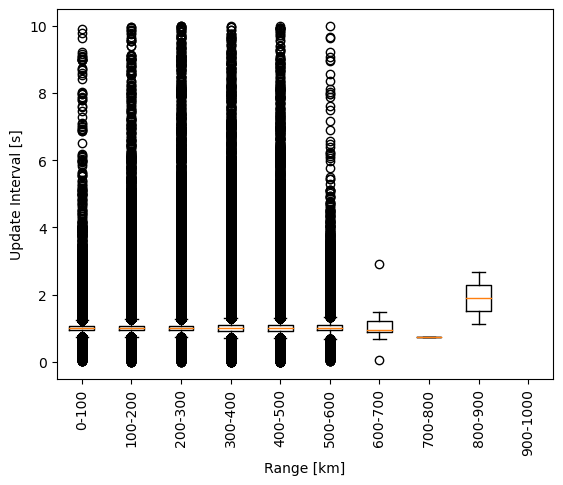

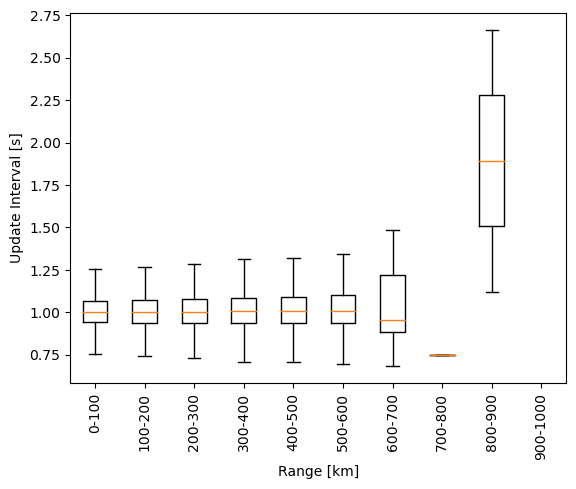

In [80]:
range_list = [i*100 for i in range(11)]

df_ranges = {}

for i in range(len(range_list) - 1):
    df_ranges['{}-{}'.format(range_list[i], range_list[i+1])] = df[(df['range_km'] > range_list[i]) & (df['range_km'] < range_list[i+1])]
    
x_ticks = list(df_ranges.keys())
        
data = []

for key in df_ranges.keys():
    data.append(np.array(df_ranges[key]['updateinterval'].to_list()))
    
plt.boxplot(data, showfliers=True);
plt.xlabel('Range [km]')
plt.ylabel('Update Interval [s]')
plt.xticks([i+1 for i in range(10)], x_ticks, rotation = 90)

plt.show()

plt.boxplot(data, showfliers=False);
plt.xlabel('Range [km]')
plt.ylabel('Update Interval [s]')
plt.xticks([i+1 for i in range(10)], x_ticks, rotation = 90)
plt.show()


In [97]:
for i in range(6):
    print(np.median(data[i]), data[i].mean())
    

1.003000020980835 1.0064316652156147
1.003999948501587 1.0139222638421854
1.004000186920166 1.038073759940437
1.00600004196167 1.0705484503903295
1.00600004196167 1.083087280780642
1.008000135421753 1.1156629348655602


[[0.55044784]
 [1.20168907]
 [1.00182717]
 [2.04596341]
 [2.53768276]
 [2.7452152 ]
 [3.36999353]]


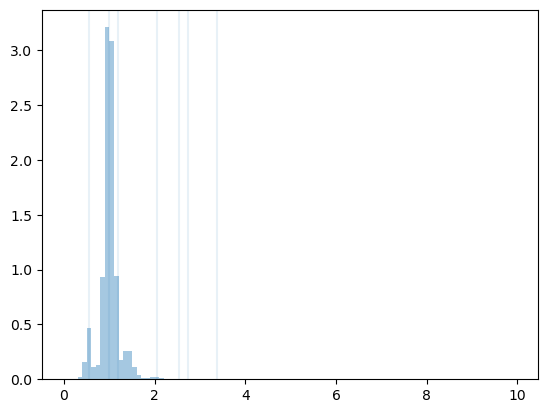

[[0.54911053]
 [1.163654  ]
 [1.002975  ]
 [2.02162024]
 [2.66483696]
 [2.9840212 ]
 [3.13781798]]


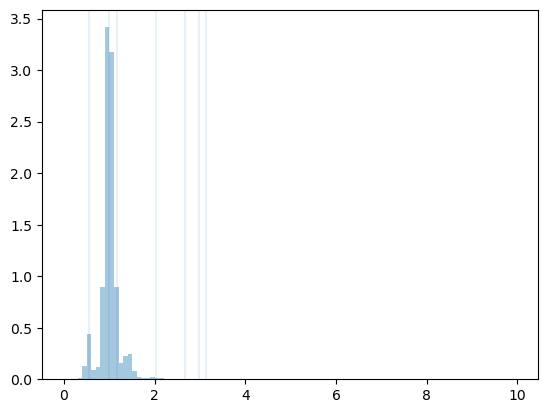

[[0.55961997]
 [1.00302257]
 [1.396973  ]
 [1.96658381]
 [1.80397132]
 [5.89838582]
 [3.50298948]]


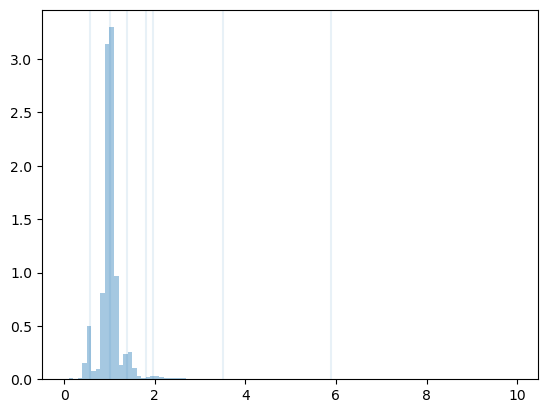

[[0.5528975 ]
 [1.00378172]
 [1.40661717]
 [1.117339  ]
 [2.23856636]
 [2.97157929]
 [3.58677917]]


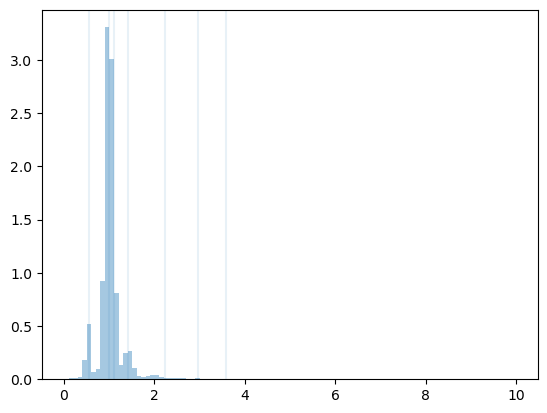

[[0.55972844]
 [1.00230778]
 [1.38657698]
 [1.97997719]
 [1.44679896]
 [2.97481461]
 [3.0340995 ]]


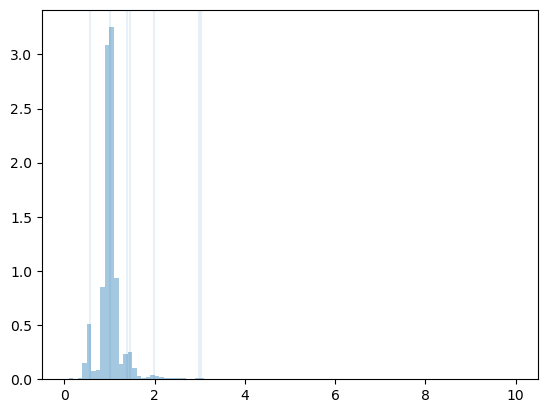

[[0.55825032]
 [2.03741445]
 [0.99989928]
 [1.30044075]
 [2.47795736]
 [3.00232353]
 [3.93492366]]


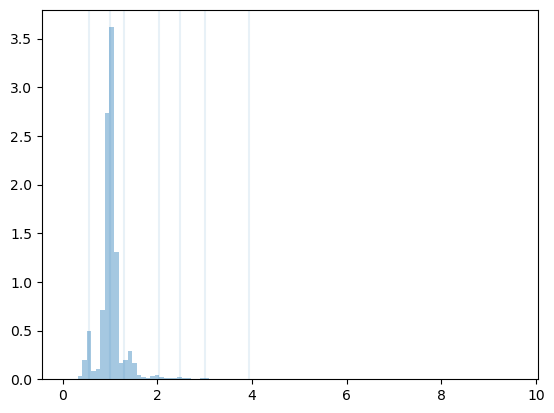

In [145]:
from sklearn import mixture

all_means = []
all_weight = []
all_cov = []

for i in range(6):
    n_comp = 7
    init_means = [[0.5*(i+1)] for i in range(n_comp)]
    data_prob = np.concatenate((data[1], data[1]))[:, np.newaxis]

    # # Fit a Gaussian Mixture Model with two components
    clf = mixture.GaussianMixture(n_components=n_comp, covariance_type='diag', means_init = init_means)
    clf.fit(data_prob)
    print(clf.means_)
    
    all_weight.append(clf.weights_)
    all_means.append(clf.means_)
    
    plt.hist(data[i], 100, density=True, histtype='stepfilled', alpha=0.4);
    
    for i in range(len(clf.means_)):
        plt.axvline(clf.means_[i], alpha = 0.1)
    
    plt.show()

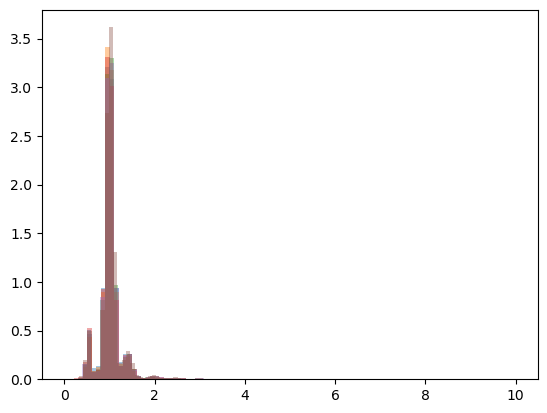

In [150]:
for i in range(6):
    plt.hist(data[i], 100, density=True, histtype='stepfilled', alpha=0.4);
#     plt.axvline(np.median(data[i]), alpha = 0.1)
    
# plt.xlim([-0.25, 10.25])

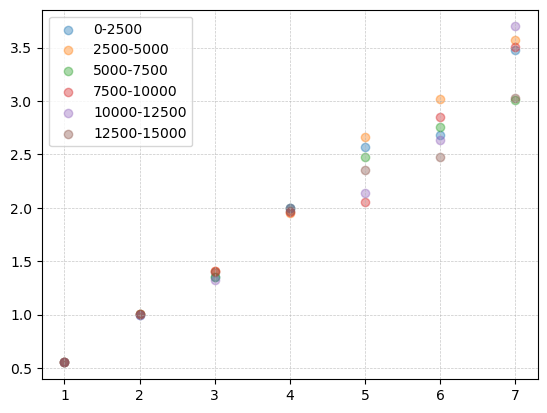

In [144]:
for mean in all_means:
    mean = sorted(mean)
    plt.scatter([i+1 for i in range(len(mean))], mean, alpha = 0.4)
    
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(x_ticks)

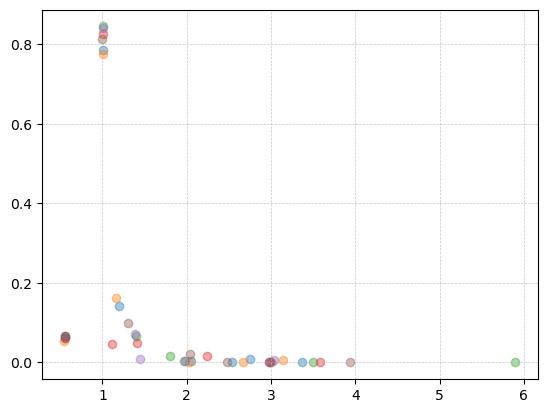

In [153]:
for i in range(6):
    plt.scatter(all_means[i], all_weight[i], alpha = 0.4)
    
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

In [81]:
import scipy.stats as stats

sample1 = data[3]
sample2 = data[4]

t_stat, p_value = stats.ttest_ind(sample1, sample2)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -9.69813806971207
p-value: 3.0824314745539783e-22


In [82]:
for i in range(6):
    print(data[i].mean())

1.0064316652156147
1.0139222638421854
1.038073759940437
1.0705484503903295
1.083087280780642
1.1156629348655602


## Altitude

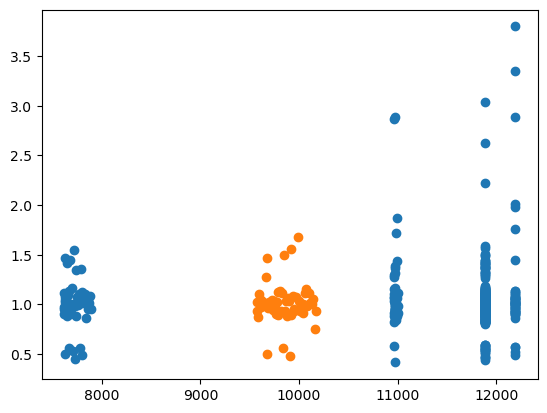

In [58]:
plt.scatter(df_0100a7['baroaltitude'], df_0100a7['updateinterval'])
plt.scatter(df_e4978e['baroaltitude'], df_e4978e['updateinterval'])

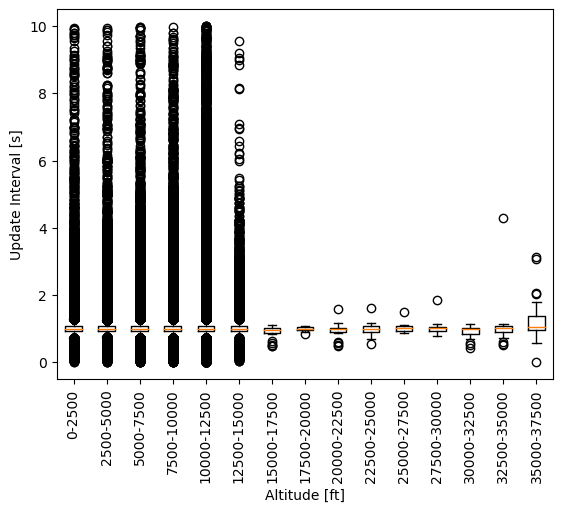

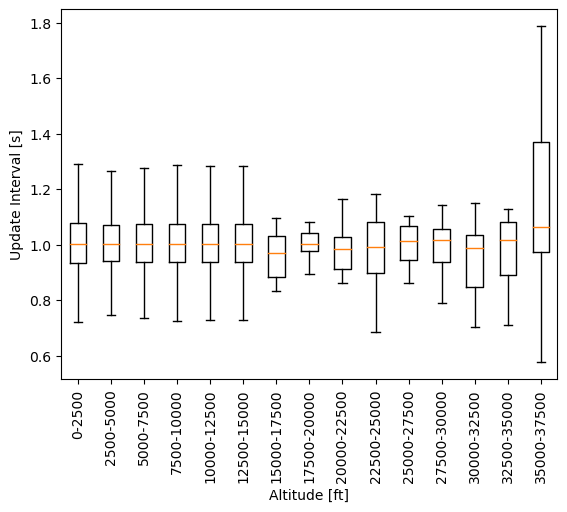

In [135]:
alt_list = [i*2500 for i in range(16)]

df_alt = {}

for i in range(len(alt_list) - 1):
    df_alt['{}-{}'.format(alt_list[i], alt_list[i+1])] = df[(df['baroaltitude'] > alt_list[i]) & (df['baroaltitude'] < alt_list[i+1])]
    
x_ticks = list(df_alt.keys())
        
data = []

for key in df_alt.keys():
    data.append(np.array(df_alt[key]['updateinterval'].to_list()))
    
plt.boxplot(data, showfliers=True);
plt.xlabel('Altitude [ft]')
plt.ylabel('Update Interval [s]')
plt.xticks([i+1 for i in range(15)], x_ticks, rotation = 90)

plt.show()

plt.boxplot(data, showfliers=False);
plt.xlabel('Altitude [ft]')
plt.ylabel('Update Interval [s]')
plt.xticks([i+1 for i in range(15)], x_ticks, rotation = 90)
plt.show()


In [136]:
import scipy.stats as stats

sample1 = data[0]
sample2 = data[1]

t_stat, p_value = stats.ttest_ind(sample1, sample2)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 5.81556652330729
p-value: 6.0506431197214634e-09


In [138]:
for i in range(16-1):
    print(data[i].mean())

1.030643239185281
1.0224023306284098
1.0308999336180122
1.037166470075164
1.0385249546054882
1.0409296217887816
0.9092143177986145
0.9968823545119342
0.9493076984698956
1.003294117310468
1.0266666571299234
1.0413529311909395
0.9195200157165527
1.1116315942061574
1.2799999713897705


## Velocity

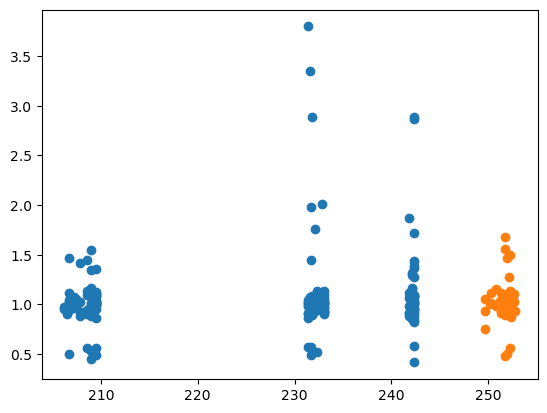

In [59]:
interest = df_0100a7[df_0100a7['heading'] > 180]

plt.scatter(interest['velocity'], interest['updateinterval'])
plt.scatter(df_e4978e['velocity'], df_e4978e['updateinterval'])

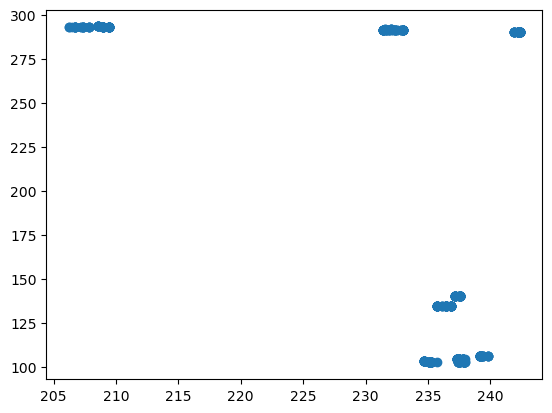

In [38]:
plt.scatter(df_0100a7['velocity'], df_0100a7['heading'])

## Maximum Range

In [60]:
max(df['range_km'])

3810.0306039197712

# ONERA

In [46]:
df = pd.read_csv('scrap_results/1433801924.csv')
df_grouped = df.groupby('icao24', group_keys=True).apply(lambda x: x)
df_grouped['updateinterval'] = df_grouped['lastposupdate'].diff()
df = df_grouped.reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)
df = df[(df['updateinterval'] > 0) & (df['updateinterval'] < 50)]
df.dropna(subset=["updateinterval"], inplace=True)
display(df)

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour,item,updateinterval
1,1656167409,0100f6,41.188256,2.821052,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,0.956
2,1656167410,0100f6,41.187973,2.822815,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,0.421
3,1656167411,0100f6,41.187149,2.827515,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,1.634
4,1656167412,0100f6,41.186783,2.829834,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,0.929
5,1656167413,0100f6,41.186188,2.833313,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,1.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784209,1656073838,e8044f,46.547908,0.144127,251.722974,21.583969,-12.35456,LAN702,False,False,False,4331.0,11567.16,11849.10,1.656074e+09,1.656074e+09,1656072000,1433801924,1.101
1784210,1656073839,e8044f,46.548746,0.144608,251.722974,21.583969,-12.35456,LAN702,False,False,False,4331.0,11567.16,11849.10,1.656074e+09,1.656074e+09,1656072000,1433801924,0.491
1784216,1656073845,e8044f,46.562247,0.152298,252.012984,21.432185,-12.02944,LAN702,False,False,False,4331.0,11490.96,11849.10,1.656074e+09,1.656074e+09,1656072000,1433801924,6.500
1784217,1656073846,e8044f,46.565179,0.153946,252.012984,21.432185,-11.70432,LAN702,False,False,False,4331.0,11475.72,11772.90,1.656074e+09,1.656074e+09,1656072000,1433801924,1.196


In [47]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat_receiver, lon_receiver):
    R = 6371.0  # radius of the Earth in km

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat_receiver_rad = radians(lat_receiver)
    lon_receiver_rad = radians(lon_receiver)

    dlon = lon_receiver_rad - lon1_rad
    dlat = lat_receiver_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat_receiver_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance  # in km


lat_receiver = 51.989988084475705
lon_receiver = 4.375442420935356

df['range_km'] = df.apply(lambda row: haversine(row['lat'], row['lon'], lat_receiver, lon_receiver), axis=1)

In [49]:
df_0100f6 = df[df['icao24'] == '0100f6']
df_e8044f = df[df['icao24'] == 'e8044f']

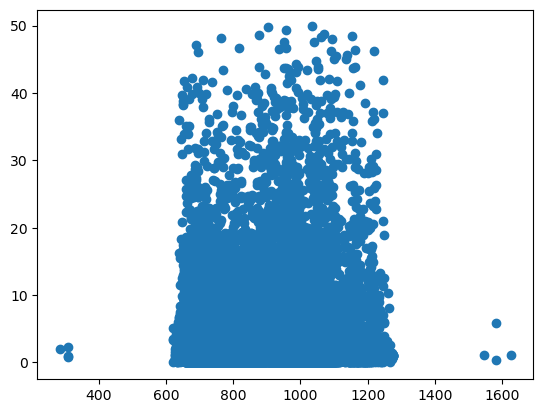

In [51]:
plt.scatter(df['range_km'], df['updateinterval'])

## Toulouse

In [47]:
df = pd.read_csv('scrap_results/1433801924.csv')

In [70]:
df_grouped = df.groupby('icao24', group_keys=True).apply(lambda x: x)
df_grouped['updateinterval'] = df_grouped['lastposupdate'].diff()
df = df_grouped.reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)
df = df[(df['updateinterval'] > 0) & (df['updateinterval'] < 10)]
df.dropna(subset=["updateinterval"], inplace=True)
display(df)

,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour,item,updateinterval,range_km
1,0100f6,41.187973,2.822815,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,0.421,287.277941
2,0100f6,41.187149,2.827515,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,1.634,287.511875
3,0100f6,41.186783,2.829834,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,0.929,287.623299
4,0100f6,41.186188,2.833313,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,1.046,287.795308
5,0100f6,41.185776,2.835632,251.600986,102.757532,0.00000,AMV6184,False,False,False,5316.0,10972.80,11391.90,1.656167e+09,1.656167e+09,1656165600,1433801924,0.932,287.911659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514965,e8044f,46.547908,0.144127,251.722974,21.583969,-12.35456,LAN702,False,False,False,4331.0,11567.16,11849.10,1.656074e+09,1.656074e+09,1656072000,1433801924,1.101,347.023411
1514966,e8044f,46.548746,0.144608,251.722974,21.583969,-12.35456,LAN702,False,False,False,4331.0,11567.16,11849.10,1.656074e+09,1.656074e+09,1656072000,1433801924,0.491,347.100707
1514967,e8044f,46.562247,0.152298,252.012984,21.432185,-12.02944,LAN702,False,False,False,4331.0,11490.96,11849.10,1.656074e+09,1.656074e+09,1656072000,1433801924,6.500,348.348956
1514968,e8044f,46.565179,0.153946,252.012984,21.432185,-11.70432,LAN702,False,False,False,4331.0,11475.72,11772.90,1.656074e+09,1.656074e+09,1656072000,1433801924,1.196,348.621070


## Range

In [71]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat_receiver, lon_receiver):
    R = 6371.0  # radius of the Earth in km

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat_receiver_rad = radians(lat_receiver)
    lon_receiver_rad = radians(lon_receiver)

    dlon = lon_receiver_rad - lon1_rad
    dlat = lat_receiver_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat_receiver_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance  # in km


lat_receiver = 43.57131525997205
lon_receiver = 1.4725008450836121

df['range_km'] = df.apply(lambda row: haversine(row['lat'], row['lon'], lat_receiver, lon_receiver), axis=1)

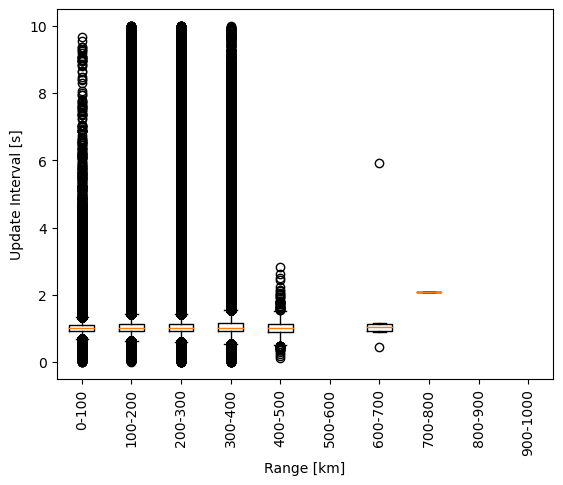

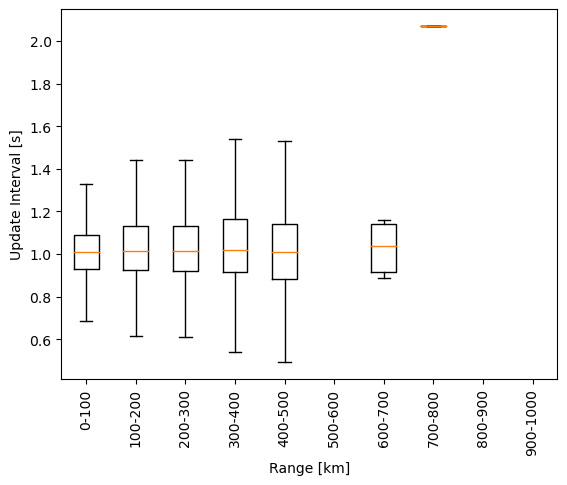

In [72]:
range_list = [i*100 for i in range(11)]

df_ranges = {}

for i in range(len(range_list) - 1):
    df_ranges['{}-{}'.format(range_list[i], range_list[i+1])] = df[(df['range_km'] > range_list[i]) & (df['range_km'] < range_list[i+1])]
    
x_ticks = list(df_ranges.keys())
        
data = []

for key in df_ranges.keys():
    data.append(np.array(df_ranges[key]['updateinterval'].to_list()))
    
plt.boxplot(data, showfliers=True);
plt.xlabel('Range [km]')
plt.ylabel('Update Interval [s]')
plt.xticks([i+1 for i in range(10)], x_ticks, rotation = 90)

plt.show()

plt.boxplot(data, showfliers=False);
plt.xlabel('Range [km]')
plt.ylabel('Update Interval [s]')
plt.xticks([i+1 for i in range(10)], x_ticks, rotation = 90)
plt.show()


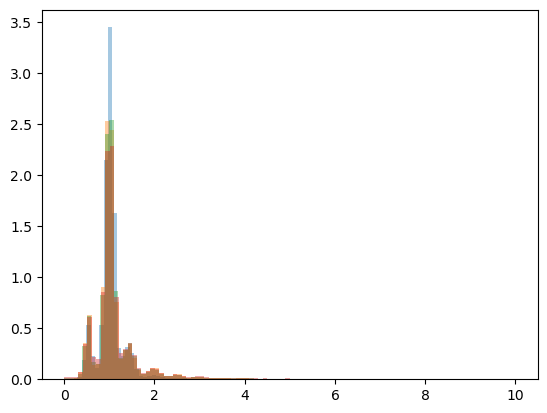

In [73]:
plt.hist(data[0], 100, density=True, histtype='stepfilled', alpha=0.4);
plt.hist(data[1], 100, density=True, histtype='stepfilled', alpha=0.4);
plt.hist(data[2], 100, density=True, histtype='stepfilled', alpha=0.4);
plt.hist(data[3], 100, density=True, histtype='stepfilled', alpha=0.4);

# plt.xlim([-0.25, 10.25])

In [74]:
for i in range(5):
    print(data[i].mean())

1.0326885509432868
1.1447047780432433
1.1521308453988142
1.2048684475945348
1.0420803566064154


In [61]:
import scipy.stats as stats

sample1 = data[3]
sample2 = data[4]

t_stat, p_value = stats.ttest_ind(sample1, sample2)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 3.0016191778077244
p-value: 0.0026859063322379325


In [53]:
for i in range(6):
    print(data[i].mean())

1.0425575296524703
1.1819869470433526
1.2091051673640718
1.2872540757275608
1.0881085101594317
nan


/var/folders/gt/7bzbbv711312cfd_13h4fkm5z8xgxd/T/ipykernel_98474/3989076887.py:2: RuntimeWarning: Mean of empty slice.
  print(data[i].mean())
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [54]:
max(df['range_km'])

722.3339481684015